In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from gptchem.plotsettings import *

%matplotlib inline


In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [6]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,100,0.173650,0.654809,0.049751
1,200,0.150851,0.477499,0.035805
2,20,0.230985,0.545169,0.075770
3,20,0.216443,0.485820,0.058782
4,10,0.226739,0.537969,0.073297
...,...,...,...,...
135,20,0.222090,0.611481,0.070250
136,200,0.138970,0.584833,0.036906
137,100,0.182754,0.651632,0.053980
138,50,0.182502,0.569832,0.049196


In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std"]
)

In [8]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std"]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std"])

In [9]:
compiled_grouped_res

mae           max_error            mse  \
                                     mean       std      mean  std      mean   
representation num_train_points                                                
DreherDoyle    10                     NaN       NaN       NaN  NaN       NaN   
               200               0.288333  0.028577       1.0  0.0  0.288333   
SuzukiMiyaura  10                0.385556  0.045854       1.0  0.0  0.385556   
               20                0.393846  0.065488       1.0  0.0  0.393846   
               50                0.323462  0.056635       1.0  0.0  0.323462   
               100               0.290000  0.072498       1.0  0.0  0.290000   
               200               0.244074  0.050555       1.0  0.0  0.244074   

                                           
                                      std  
representation num_train_points            
DreherDoyle    10                     NaN  
               200               0.028577  
SuzukiMiyaura  10                0.045854  
               20                0.065488  
               50                0.056635  
               100               0.072498  
               200               0.050555

In [10]:
compiled_rxnfp_linear_grouped

mae           max_error                 mse          
                      mean       std      mean       std      mean       std
num_train_points                                                            
10                0.235931  0.025441  0.605663  0.095395  0.079180  0.015883
20                0.231545  0.024463  0.551946  0.047918  0.074043  0.013173
50                0.205306  0.012966  0.564200  0.041564  0.061733  0.006574
100               0.188827  0.016533  0.568220  0.059245  0.053691  0.006911
200               0.183520  0.011513  0.566908  0.058258  0.051614  0.005804

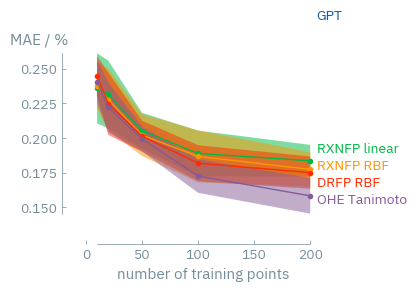

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"],
    label="RXNFP linear",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["std"],
    compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"],
    label="RXNFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["std"],
    compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"],
    label="DRFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["std"],
    compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["std"],
    alpha=0.5,
)

ax.plot(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"],
    label="OHE Tanimoto",
    marker="o",
)

ax.fill_between(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["std"],
    compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["std"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / %", y_pad=-0.05)
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_ohe_tanimoto_grouped.index,
     np.stack(
        [
             compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["std"],
                 compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["std"]
        ]
     ).flatten()
)

fig.savefig("suzuki_regression_res.pdf", bbox_inches="tight")